In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd

In [ ]:
regions = {
    "North America": [
        "Canada", "Mexico", "United States of America"
    ],
    "Latin America": [
        "Argentina", "Barbados", "Bolivia", "Brazil", "Chile", "Colombia", "Costa Rica",
        "Cuba", "Dominican Republic", "Ecuador", "El Salvador", "Guatemala", "Guyana",
        "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Paraguay",
        "Peru", "Suriname", "Trinidad and Tobago", "Uruguay", "Venezuela"
    ],
    "Europe": [
        "Albania", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria",
        "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France",
        "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo", "Latvia",
        "Lithuania", "Luxembourg", "Malta", "Moldova", "Montenegro", "Netherlands",
        "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia", "Serbia",
        "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom"
    ],
    "Sub-Saharan Africa": [
        "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cape Verde",
        "Central African Republic", "Chad", "Comoros", "Democratic Republic of the Congo",
        "Djibouti", "Equatorial Guinea", "Eswatini", "Ethiopia", "Gabon", "Ghana",
        "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia",
        "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Mozambique", "Namibia",
        "Niger", "Nigeria", "Republic of the Congo", "Rwanda", "Sao Tome and Principe",
        "Senegal", "Seychelles", "Sierra Leone", "Solomon Islands", "Somalia", "Somaliland",
        "South Africa", "South Sudan", "Sudan", "Tanzania", "The Gambia", "Togo",
        "Uganda", "Zambia", "Zimbabwe", "Zanzibar"
    ],
    "Middle East & North Africa (MENA)": [
        "Algeria", "Bahrain", "Egypt", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
        "Lebanon", "Libya", "Morocco", "Oman", "Palestine/Gaza", "Palestine/West Bank",
        "Qatar", "Saudi Arabia", "South Yemen", "Syria", "Tunisia", "Turkey", "United Arab Emirates", "Yemen"
    ],
    "South Asia": [
        "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"
    ],
    "East Asia": [
        "China", "Hong Kong", "Japan", "Mongolia", "North Korea", "South Korea", "Taiwan"
    ],
    "Southeast Asia": [
        "Burma/Myanmar", "Cambodia", "Indonesia", "Laos", "Malaysia", "Philippines",
        "Singapore", "Thailand", "Timor-Leste", "Vietnam"
    ],
    "Oceania": [
        "Australia", "Fiji", "New Zealand", "Papua New Guinea", "Vanuatu"
    ]
}

regions["Europe"].extend([
    "Armenia",
    "Azerbaijan",
    "Georgia",
    "German Democratic Republic",
    "Kazakhstan",
    "Kyrgyzstan",
    "Tajikistan",
    "Turkmenistan",
    "Uzbekistan"
])

regions["Sub-Saharan Africa"].extend([
    "Cameroon",
    "Eritrea"
])

regions["Southeast Asia"].append("Republic of Vietnam")


In [ ]:
countries = gpd.read_file('country_factors.geojson')

In [ ]:
countries['region'] = countries['cntry_name'].apply(lambda x: next((k for k, v in regions.items() if x in v), None))

In [ ]:
importances = {
    "North America" : "Legislative and Judicial Compliance",
    "Latin America" : "Speech and Press Suppression",
    "Europe" : "Inclusivity and Fair processes",
    "Sub-Saharan Africa" : "Electoral Integrity",
    "Middle East & North Africa (MENA)" : "Institutional Control",
    "South Asia" : "Governmental Power Balance",
    "East Asia" : "Secularism and Social Discrimination",
    "Southeast Asia" : "Speech and Press Suppression",
    "Oceania" : "Clean Democracy"
}

In [ ]:
countries[countries['region'].isna()]['cntry_name'].unique()

array([], dtype=object)

In [ ]:
countries['importances'] = countries['region'].apply(lambda x: importances[x])

<Axes: >

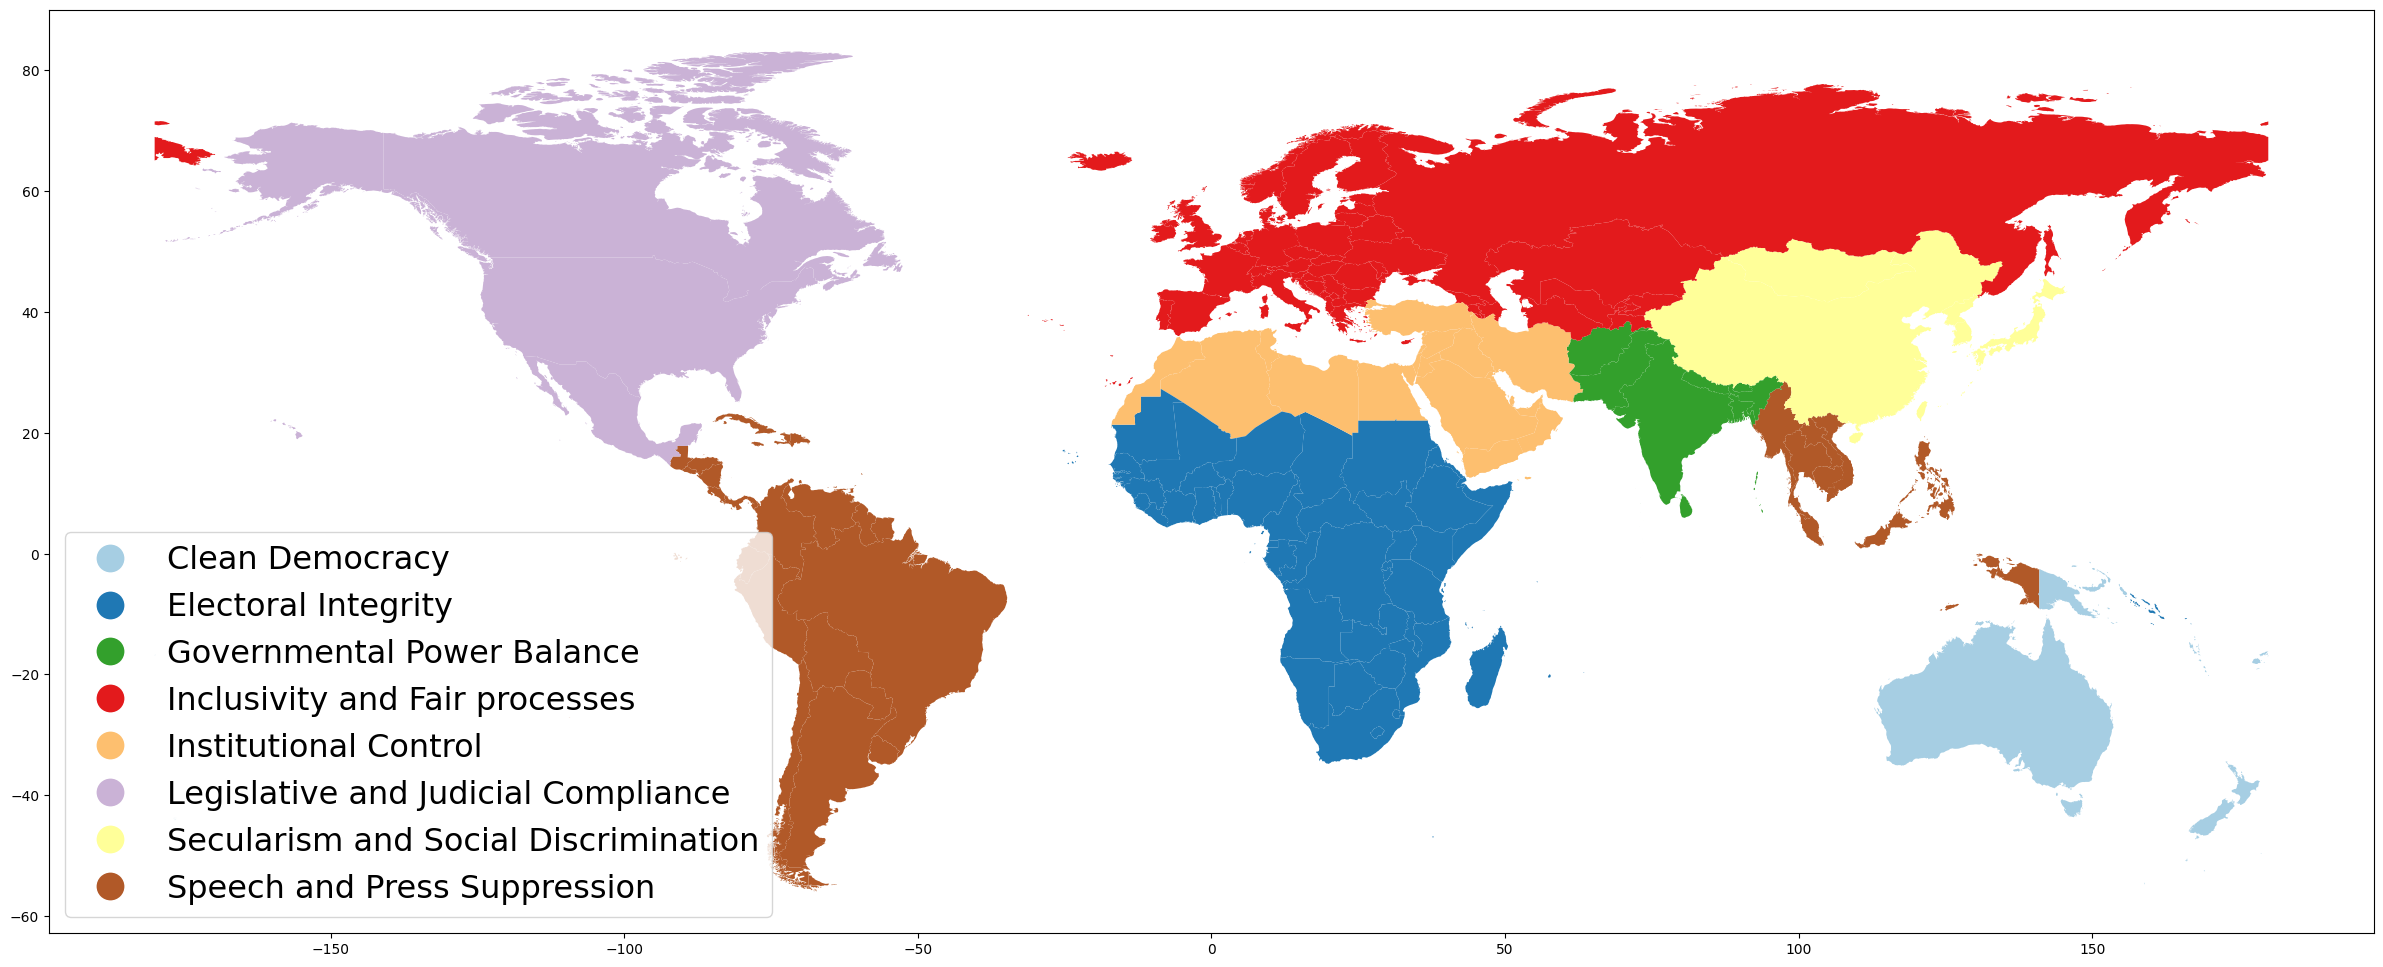

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))
countries.drop_duplicates(subset=['cntry_name'], keep='last').plot(column='importances', cmap='Paired', ax=ax, legend=True, linewidth=0.35, legend_kwds={
        'loc': 'lower left',
        'fontsize': 23,
        'markerscale':2
    })